In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/Data Visualization/Data-Preparation-and-Visualization/9.LR-KNN-SVM/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

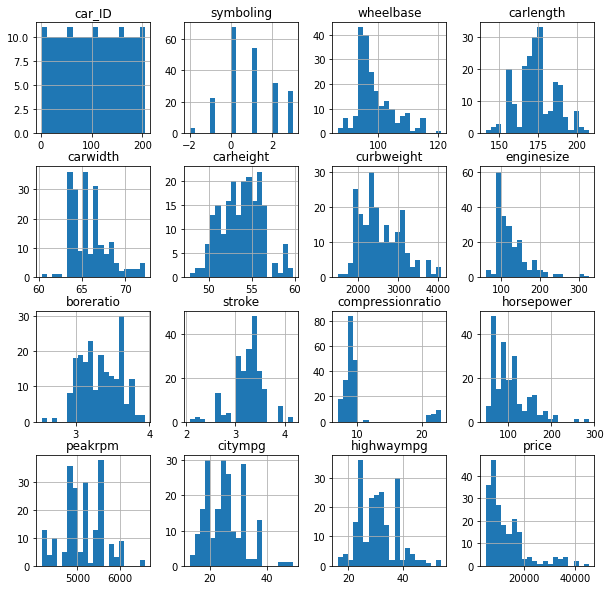

In [6]:
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize= (10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


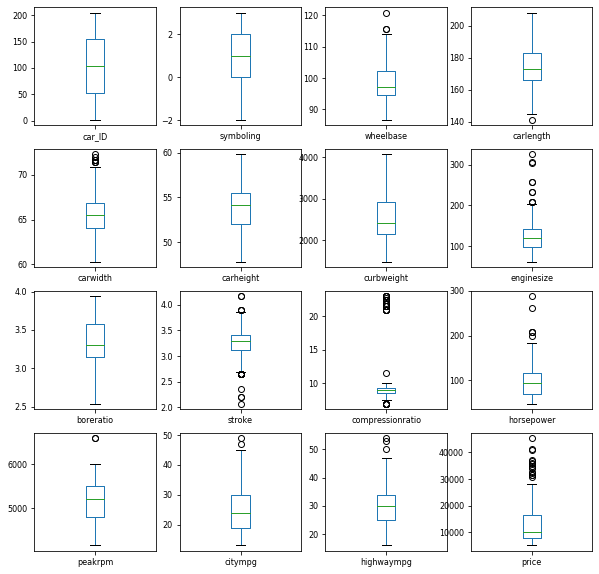

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

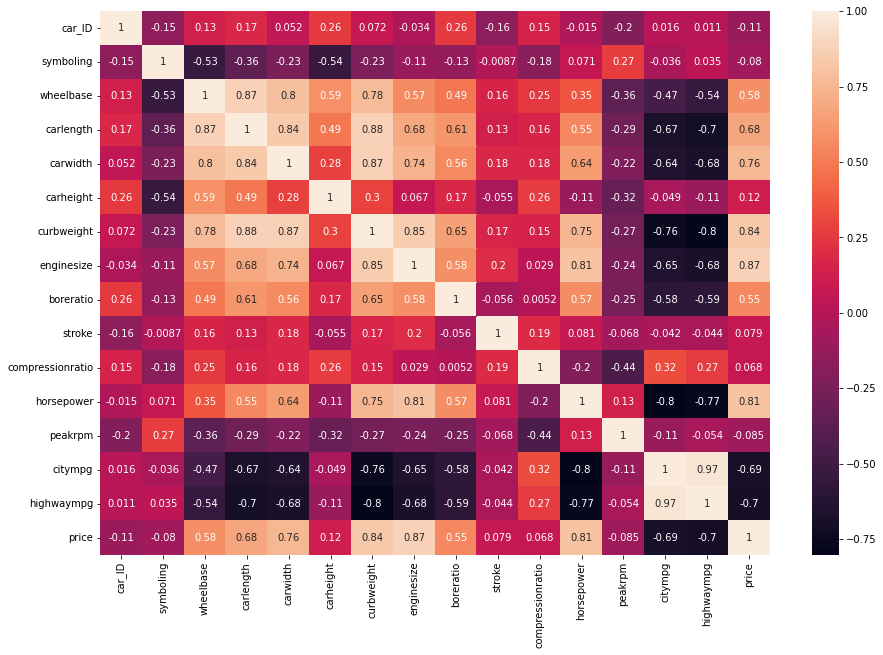

In [8]:
import seaborn
plt.figure(figsize=[15,10])
seaborn.heatmap(df.corr(),annot=True)

In [12]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

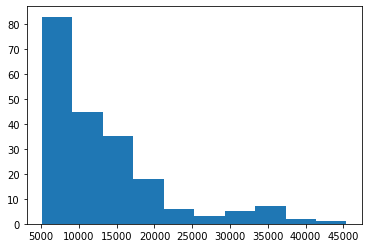

In [16]:
plt.hist(df['price'])

## Corr

In [174]:
data = df.copy()

In [175]:
corr_matrix = df.corr().abs()

In [176]:
a = np.matrix([[1, 21, 30], 
                 [63 ,434, 3], 
                 [54, 54, 56]])
  
print("Main Diagonal elements : \n", np.triu(a, k = 1), "\n")

Main Diagonal elements : 
 [[ 0 21 30]
 [ 0  0  3]
 [ 0  0  0]] 



In [177]:
upper = corr_matrix.where(np.triu(corr_matrix, k=1).astype(np.bool))
upper

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,NaN,0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
symboling,NaN,NaN,0.531954,0.357612,0.232919,0.541038,0.227691,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
wheelbase,NaN,NaN,NaN,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,0.360469,0.470414,0.544082,0.577816
carlength,NaN,NaN,NaN,NaN,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,0.287242,0.670909,0.704662,0.682920
carwidth,NaN,NaN,NaN,NaN,NaN,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,0.220012,0.642704,0.677218,0.759325
carheight,NaN,NaN,NaN,NaN,NaN,NaN,0.295572,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
curbweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850594,0.648480,0.168790,0.151362,0.750739,0.266243,0.757414,0.797465,0.835305
enginesize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583774,0.203129,0.028971,0.809769,0.244660,0.653658,0.677470,0.874145
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012,0.553173
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443


In [178]:
print(upper.columns)
print(corr_matrix.columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [179]:
to_drop1 = [column for column in upper.columns if any(upper[column] < 0.05)]
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop2, to_drop1

(['highwaympg'],
 ['enginesize',
  'stroke',
  'compressionratio',
  'horsepower',
  'citympg',
  'highwaympg'])

In [180]:
data.drop(to_drop, axis=1, inplace=True)

In [181]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

## Encoding

In [182]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
dtype: object

In [183]:
cols_object = [col for col in data if data[col].dtype == 'object']
cols_object

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [184]:
one_hot = []
label_encode = []
for col in cols_object:
  print(col, len(data[col].value_counts()))
  if len(data[col].value_counts()) > 5:
    one_hot.append(col)
  else:
    label_encode.append(col)

CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


In [185]:
one_hot

['CarName', 'enginetype', 'cylindernumber', 'fuelsystem']

In [186]:
one_hot = one_hot[1:]
one_hot

['enginetype', 'cylindernumber', 'fuelsystem']

In [187]:
data.drop(['CarName'], axis=1, inplace= True)
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

In [188]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in label_encode:
  data[col] = label_encoder.fit_transform(data[col])

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
d = pd.DataFrame(one_hot_encoder.fit_transform(data[one_hot]).toarray())


In [189]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [190]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [191]:
type(data), type(d)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [192]:
dat = pd.concat([data, d], axis = 1)
print(type(dat))
dat.head()

<class 'pandas.core.frame.DataFrame'>


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [193]:
dat.drop(one_hot, axis = 1, inplace = True)


In [194]:
dat.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,13495.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,16500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,13950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,17450.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Scaling

In [195]:
data.dtypes

car_ID                int64
symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
dtype: object

In [196]:
scale = []
for col in data.columns:
  if data[col].dtypes != 'object':
    scale.append(col)
print(scale)

['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']


In [197]:
dat['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [198]:
dat['car_ID'].value_counts()


205    1
64     1
74     1
73     1
72     1
      ..
134    1
133    1
132    1
131    1
1      1
Name: car_ID, Length: 205, dtype: int64

In [199]:
scale = scale[1:]
dat.drop(['car_ID'], axis=1, inplace = True)

In [200]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
dat[scale] = autoscaler.fit_transform(dat[scale])


In [201]:
dat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.027391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.404461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,0.404461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,0.084485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,0.523668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Outlier

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


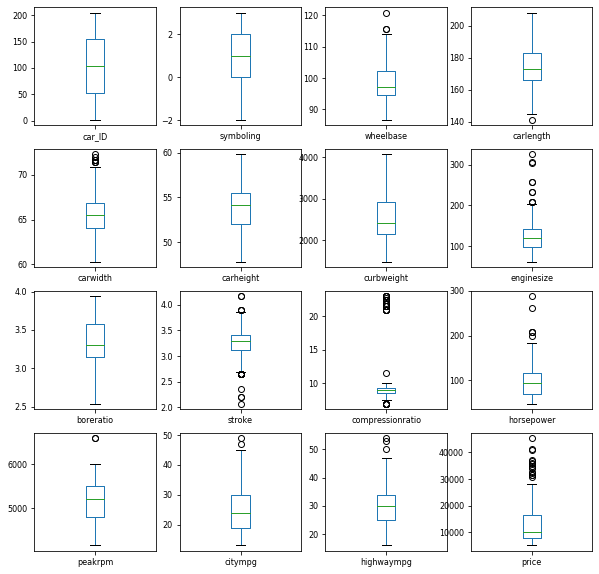

In [206]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [203]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
dat_ = lof.fit_predict(dat)
# select all rows that are not outliers
mask = dat_ != -1
dat = dat[mask]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [204]:
len(dat), len(data)

(195, 205)

# Linear Regression

In [208]:
dat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.027391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.404461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,0.404461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,0.084485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,0.523668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [209]:
dt = dat.copy()

In [211]:
y = dt['price'].values
y

array([ 2.73911432e-02,  4.04461099e-01,  4.04461099e-01,  8.44849301e-02,
        5.23667906e-01,  2.47610036e-01,  5.56292928e-01,  7.08124756e-01,
        1.32988237e+00,  5.75010530e-01,  3.95677439e-01,  4.57790460e-01,
        9.65360500e-01,  9.82300415e-01,  1.41646416e+00,  2.19381802e+00,
        3.51826840e+00,  2.96176083e+00, -8.76070979e-01, -8.40936341e-01,
       -9.66793634e-01, -8.65781550e-01, -6.67521806e-01, -8.84352716e-01,
       -8.26255082e-01, -7.11189142e-01, -5.92107815e-01, -5.46558266e-01,
       -3.92391883e-02, -8.52982503e-01, -8.05801703e-01, -9.88501821e-01,
       -8.46708460e-01, -7.71419950e-01, -7.50590129e-01, -7.50590129e-01,
       -6.75301619e-01, -5.24724598e-01, -5.56094811e-01, -3.74147578e-01,
       -4.16233245e-02, -3.67873535e-01, -8.14585363e-01, -5.47122930e-01,
       -5.47122930e-01, -2.79660498e-01,  2.38078449e+00,  2.79487130e+00,
        2.85133768e+00, -1.01409991e+00, -9.01167150e-01, -8.13330554e-01,
       -8.25878639e-01, -

In [217]:
# dt.drop(['price'], axis = 1, inplace = True)
X = dt.values 
X.shape

(195, 41)

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def LinearRegression_(X, y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)
  y_train = sc.fit_transform(y_train.reshape(-1,1))
  y_test = sc.fit_transform(y_test.reshape(-1,1))
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  print("Test ",mean_squared_error(y_test, regressor.predict(X_test)))
  print("Train ", mean_squared_error(y_train, regressor.predict(X_train)))

In [220]:
LinearRegression_(X, y)

Test  0.08705233409912742
Train  0.06747977910895536


# KNN

(array([77., 45., 34., 18.,  6.,  3.,  4.,  5.,  2.,  1.]),
 array([-1.02376194, -0.51829998, -0.01283802,  0.49262394,  0.99808591,
         1.50354787,  2.00900983,  2.51447179,  3.01993375,  3.52539571,
         4.03085767]),
 <a list of 10 Patch objects>)

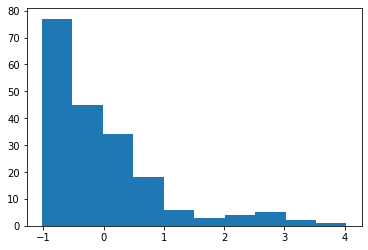

In [224]:
plt.hist(dat['price'])

In [226]:
dat['Price_'] = [0 if x <= 0 else 1 for x in dat['price']]
dat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Price_
0,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.027391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.404461,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,0.404461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,0.084485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,0.523668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [228]:
dat.columns

Index([       'symboling',         'fueltype',       'aspiration',
             'doornumber',          'carbody',       'drivewheel',
         'enginelocation',        'wheelbase',        'carlength',
               'carwidth',        'carheight',       'curbweight',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',            'price',                  0,
                        1,                  2,                  3,
                        4,                  5,                  6,
                        7,                  8,                  9,
                       10,                 11,                 12,
                       13,                 14,                 15,
                       16,                 17,                 18,
                       19,                 20,                 21,
                 'Price_'],
      dtype='object')

In [229]:
y = dat['Price_'].values
temp = dat.copy()
temp.drop(['price', 'Price_'], axis = 1, inplace = True)
X = temp.values

In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [230]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, y_train

(array([[ 0.93848971,  0.32879797, -0.46929532, ...,  1.        ,
          0.        ,  0.        ],
        [-0.67147172,  0.32879797, -0.46929532, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.74347043,  0.32879797,  2.13085442, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 0.133509  ,  0.32879797, -0.46929532, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.74347043,  0.32879797, -0.46929532, ...,  1.        ,
          0.        ,  0.        ],
        [ 1.74347043,  0.32879797, -0.46929532, ...,  1.        ,
          0.        ,  0.        ]]),
 array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
   

In [231]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  1]
 [ 3 15]]


0.8974358974358975

## Hyperparameter tuning

In [233]:
from sklearn.model_selection import cross_val_score
# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.75       0.85       0.9        1.         0.9        0.84210526
 0.94736842 0.73684211 0.89473684 0.94736842]


In [234]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.8854166666666667, 0.86625, 0.8775000000000001, 0.8779166666666667, 0.89625, 0.8841666666666667, 0.88375, 0.8591666666666666, 0.8841666666666667]


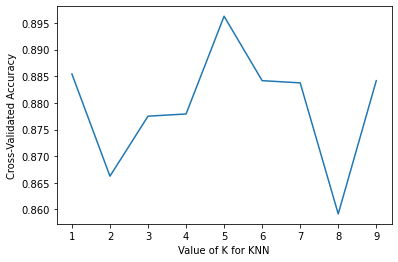

In [235]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### GridSearchCV

In [236]:
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': range(1, 10)}

In [237]:
from sklearn.model_selection import GridSearchCV
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, param_grid, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)

In [238]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 5


In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_ = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_)
print(cm)
accuracy_score(y_test, y_pred_)

[[20  1]
 [ 3 15]]


0.8974358974358975

# SVM

In [240]:
#Without Hyper Parameters Tuning
#importing module
from sklearn import svm
#making the instance
model_svm = svm.SVC(random_state=42)
#learning
model_svm.fit(X_train,y_train)
#Prediction
prediction=model_svm.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8717948717948718
Confusion Metrix:
 [[18  2]
 [ 3 16]]


## Hyperparamter tuning

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svm_c =svm.SVC()
#Hyper Parameters Set
params = {'C': [1,2,3,4,5,6,7,8,9], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
svm_tuning = GridSearchCV(svm_c, param_grid=params, n_jobs=-1)

In [242]:
svm_tuning.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",svm_tuning.best_params_)
#Prediction
prediction=svm_tuning.predict(X_test)

Best Hyper Parameters:
 {'C': 4, 'kernel': 'rbf'}


In [243]:
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8461538461538461
Confusion Metrix:
 [[18  3]
 [ 3 15]]
